In [226]:
import numpy as np
import matplotlib.pyplot as plt

In [227]:
def square_signal(x):
    if x % 2 > 1:
        return 1
    else:
        return -1

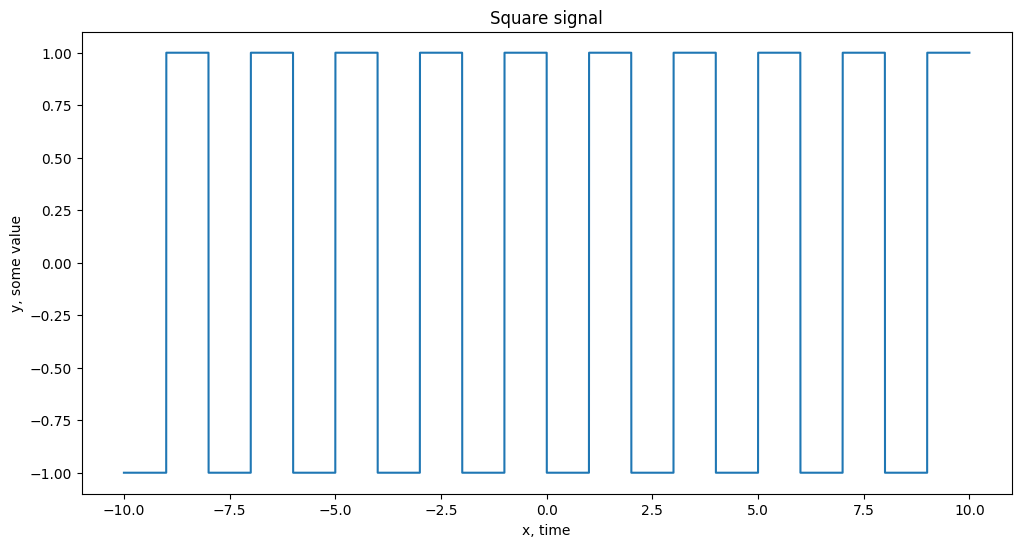

In [228]:
args = np.arange(-10, 10, 1 / 1000)
square_y = [square_signal(arg) for arg in args]

plt.figure(figsize=(12, 6))
plt.plot(args, square_y)
plt.title("Square signal")
plt.xlabel("x, time")
plt.ylabel("y, some value")
plt.show()

In [229]:
def kernel(x):
    return 0.006 * np.exp(-(x ** 2))

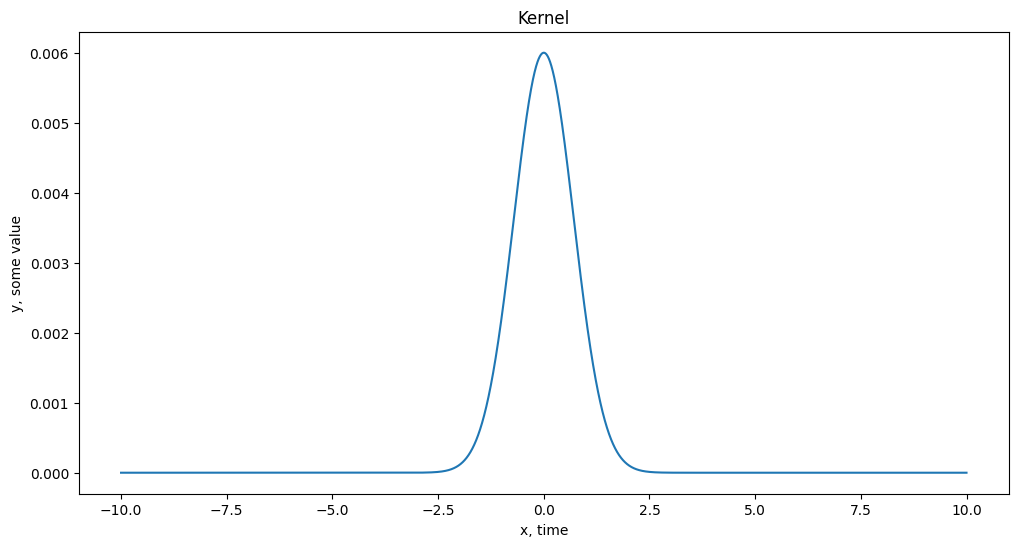

In [230]:
kernel_y = kernel(args)

plt.figure(figsize=(12, 6))
plt.plot(args, kernel_y)
plt.title("Kernel")
plt.xlabel("x, time")
plt.ylabel("y, some value")
plt.show()

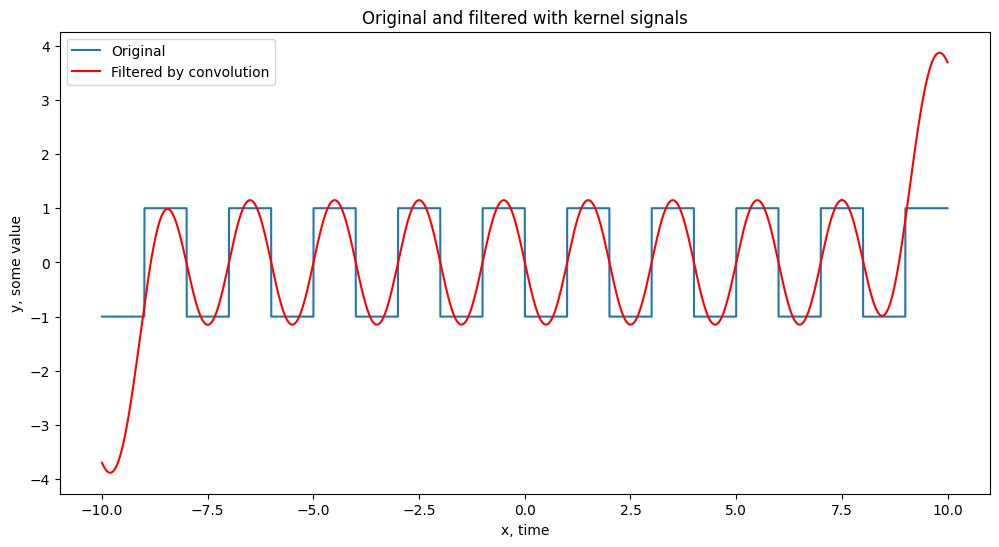

In [231]:
conv_y = np.convolve(square_y, kernel_y, mode='same')

plt.figure(figsize=(12, 6))
plt.plot(args, square_y)
plt.plot(args, conv_y, 'red')
plt.title("Original and filtered with kernel signals")
plt.xlabel("x, time")
plt.ylabel("y, some value")
plt.legend(['Original', 'Filtered by convolution'])
plt.show()

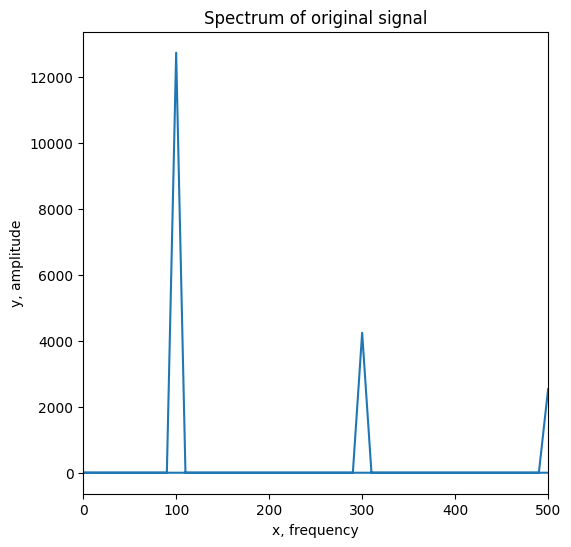

In [232]:
fft_freqs = np.fft.fftfreq(len(args), 0.1 / len(args))
square_fft_y = np.fft.fft(square_y)

plt.figure(figsize=(6, 6))
plt.plot(fft_freqs, np.abs(square_fft_y))
plt.xlim([0, 500])
plt.title("Spectrum of original signal")
plt.xlabel("x, frequency")
plt.ylabel("y, amplitude") 
plt.show()

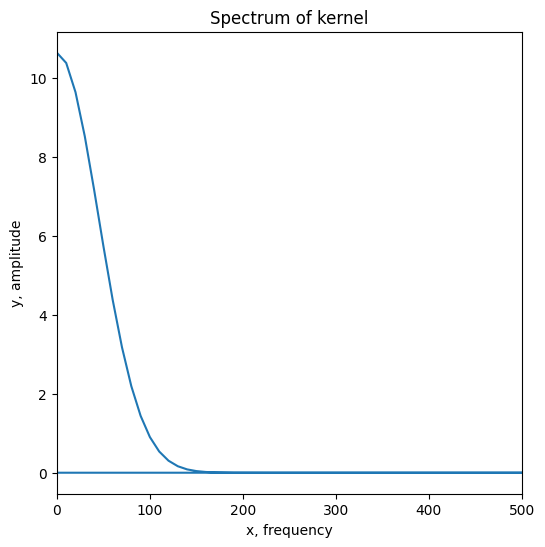

In [233]:
kernel_fft_y = np.fft.fft(kernel_y)

plt.figure(figsize=(6, 6))
plt.plot(fft_freqs, np.abs(kernel_fft_y))
plt.xlim([0, 500])
plt.title("Spectrum of kernel")
plt.xlabel("x, frequency")
plt.ylabel("y, amplitude") 
plt.show()

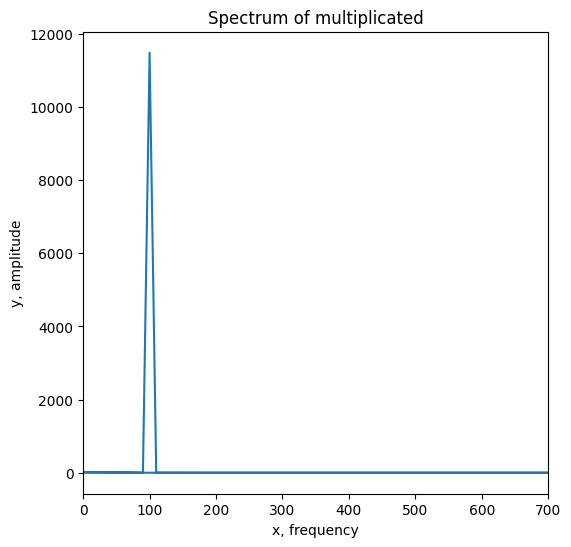

In [234]:
multiplication_fft_y = square_fft_y * kernel_fft_y

plt.figure(figsize=(6, 6))
plt.plot(fft_freqs, np.abs(multiplication_fft_y))
plt.xlim([0, 700])
plt.title("Spectrum of multiplicated")
plt.xlabel("x, frequency")
plt.ylabel("y, amplitude") 
plt.show()

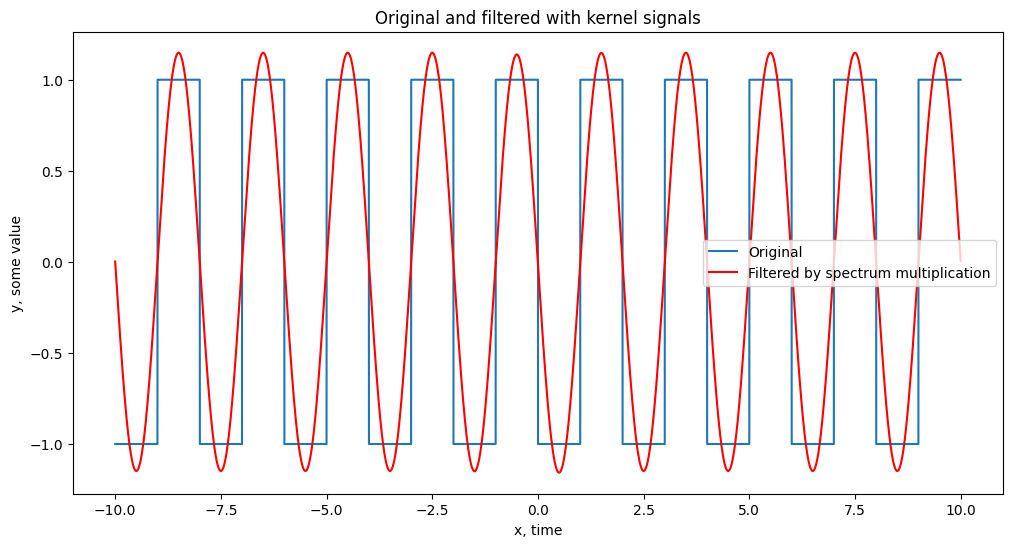

In [235]:
multiplication_from_ifft_y = np.fft.ifft(multiplication_fft_y)

plt.figure(figsize=(12, 6))
plt.plot(args, square_y)
plt.plot(args, multiplication_from_ifft_y, 'red')
plt.title("Original and filtered with kernel signals")
plt.xlabel("x, time")
plt.ylabel("y, some value")
plt.legend(['Original', 'Filtered by spectrum multiplication'])
plt.show()

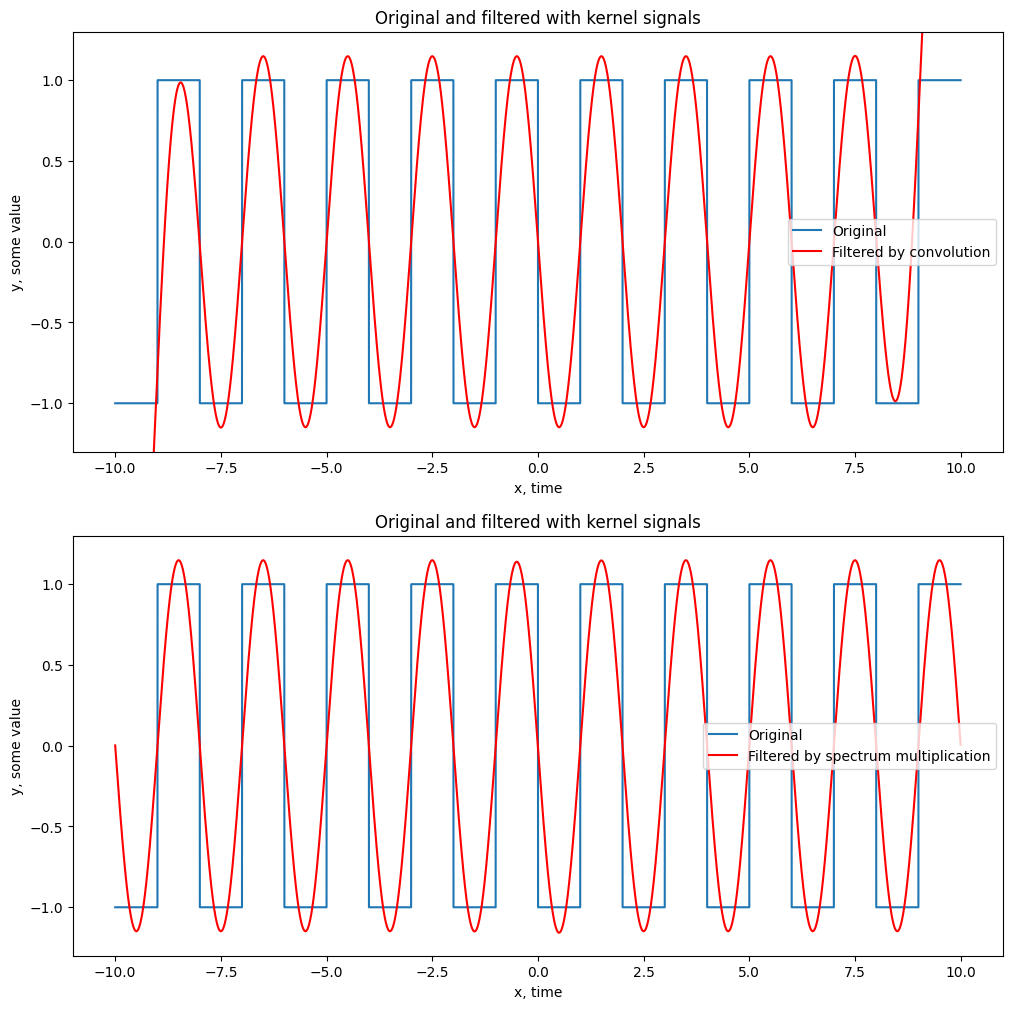

In [236]:
plt.figure(figsize=(12, 12))

plt.subplot(211)
plt.ylim([-1.3, 1.3])
plt.plot(args, square_y)
plt.plot(args, conv_y, 'red')
plt.title("Original and filtered with kernel signals")
plt.xlabel("x, time")
plt.ylabel("y, some value")
plt.legend(['Original', 'Filtered by convolution'])

plt.subplot(212)
plt.ylim([-1.3, 1.3])
plt.plot(args, square_y)
plt.plot(args, multiplication_from_ifft_y, 'red')
plt.title("Original and filtered with kernel signals")
plt.xlabel("x, time")
plt.ylabel("y, some value")
plt.legend(['Original', 'Filtered by spectrum multiplication'])
plt.show()